<a href="https://colab.research.google.com/github/ZariaRiv/Big-Data-Business-Analysis/blob/main/Big_Data_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

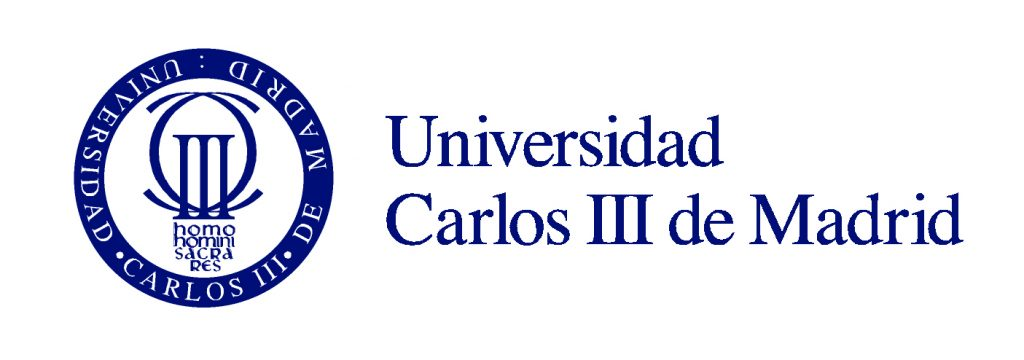

**Final Project**

**Students**: **Ivan Georgiev(100545234), Katarzyna Klęczek(100549157), Zornitsa Georgieva(100545233), Bajai Resch(100545321), Evi Walter(100544787), Rylie Ramos-M.(100530337)**

**Main Idea:** We aim to launch a StartUp focused on providing Airbnb accommodations in strategically selected cities.  

*Main Steps:*
1. Identify a city with the fewest superhosts and lowest competition.

2. Map neighborhoods with above-average review_scores_location and prices.

3. Position ourselves as the top choice within the selected neighborhoud.

4. Deliver the best customer experience as the leading superhost in areas with few or no superhosts.


In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_folder_path = "/content/drive/MyDrive/Colab Notebooks/Airbnb 2"

In [ ]:
folders = os.listdir(data_folder_path)
folders

['Brussels',
 'Stockholm',
 'NYC',
 'Bangkok',
 'Malaga',
 'LA',
 'Amsterdam',
 'Rome',
 'Berlin',
 'Prague',
 'San Francisco',
 'Copenhaguen',
 'London',
 'Naples',
 'Menorca',
 'Bordeaux',
 'San Diego',
 'Singapore',
 'Boston',
 'Madrid',
 'Lisbon',
 'Chicago',
 'Mallorca',
 'Beijing',
 'Austin',
 'Milan',
 'Paris',
 'Barcelona']

# FINDING SUPER HOST CITIES

## Our Idea

**Steps to Analyze and Choose the Best City for Airbnb**

1. Process the listings.csv.gz files for European Cities:
- Filter columns:
 * host_id
 * host_is_superhost
 * review_scores_location
 * price
 * latitude, longitude

2. Count Superhosts in Each City:

- Identify unique host_id.
- Count rows where host_is_superhost is True.
- Create a dictionary: {city_name: number_of_super_hosts}.
- Filter Listings by Area Quality:
  - calculating the average review_scores_location for each city
  - identify neighborhoods or areas within the city where review_scores_location > city average.

3. Incorporate Pricing Data (Optional):

- Analyze pricing trends in high-rating areas.
- Filter for neighborhoods with above-average prices for profitability analysis.

4. Visualize Data:

- Use of latitude and longitude to plot all neighborhoods/areas with their average review scores and price data.
- Highlight cities with fewer superhosts and their "nice" neighborhoods.
- Amenities Analysis: (1) check for descriptions or keywords in the listings indicating ameneties types or styles and (2) categorize and correlate with review scores.
- Choose the Best City and Area: analysis of short-term rental listings among high-priced properties.

------------------------------------------------------------------------

**Tasks for Later Analysis:**
1. Logistic Regression analysis
-  Making predictions and finding patterns.

2. Review Sentiment Analysis:
- Perform text analysis on guest reviews.
- Use natural language processing (NLP) to assess sentiment.
- Identify correlations between sentiment and superhost status.



## Step 1: Processing the listings.csv.gz files for all Cities

In [ ]:
import pandas as pd

# Dictionary to store cities and number of super hosts
cities_superhosts = {}


In [ ]:
for folder in os.listdir(data_folder_path):
    folder_path = os.path.join(data_folder_path, folder)

    if os.path.isdir(folder_path):
        listings_file_path = os.path.join(folder_path, 'listings.csv.gz')

        if os.path.exists(listings_file_path):
            try:
                df = pd.read_csv(listings_file_path, compression='gzip', low_memory=False)

                #number of listings in the file
                number_of_properties = len(df)

                #look at the number of listings with unique host_id (optional)
                #HERE GOES A CODE
                df_unique_host_id = df["host_id"].unique()

                #count how many host_is_superhost is true in the file and store the number in variable number_of_super_hosts
                number_of_super_hosts = df[df["host_is_superhost"] == "t"]["host_id"].nunique()

                # our metric to measure how big competition there is
                metirc = number_of_super_hosts/number_of_properties

                # Add to the dictionary with the folder name as key
                cities_superhosts[folder] = metirc

                print(f"Loaded listings.csv from {folder}")
                print("competition metric: ", metirc, "\n")
            except Exception as e:
                print(f"Error reading {listings_file_path}: {e}")
        else:
            print(f"listingss.csv not found in {folder}")

Loaded listings.csv from Brussels
competition metric:  0.14806340905376694 

Loaded listings.csv from Stockholm
competition metric:  0.10074074074074074 

Loaded listings.csv from NYC
competition metric:  0.10524493220745318 

Loaded listings.csv from Bangkok
competition metric:  0.06786182402435414 

Loaded listings.csv from Malaga
competition metric:  0.11486185383244207 

Loaded listings.csv from LA
competition metric:  0.16273911229218369 

Loaded listings.csv from Amsterdam
competition metric:  0.13303654622631741 

Loaded listings.csv from Rome
competition metric:  0.19130383723319927 

Loaded listings.csv from Berlin
competition metric:  0.12588124136928555 

Loaded listings.csv from Prague
competition metric:  0.1315905581292742 

Loaded listings.csv from San Francisco
competition metric:  0.22607915972844883 

Loaded listings.csv from Copenhaguen
competition metric:  0.09990913003969583 

Loaded listings.csv from London
competition metric:  0.08763594019671041 

Loaded listing

**Interpretation:**

Firstly, we analyzed Airbnb data across cities, calculating a competition metric (ratio of superhosts to total properties) to assess market dynamics.

Key Observations:

- Cities with low competition metrics, like Singapore (0.0152), Bangkok (0.0678), and London (0.0876), are favorable for new Airbnb ventures.
- High competition cities, such as San Francisco (0.2260) and San Diego (0.2234), present stronger challenges for new entrants.
- The error in Beijing occurs because the total number of properties is zero, leading to a division by zero. But since we wanted to focus on the european cities this is not further analyzed or corrected


In [ ]:
# now sort based on the values with ascending order and print the top three
cities_superhosts_sorted = dict(sorted(cities_superhosts.items(), key=lambda item: item[1]))
cities_superhosts_sorted

{'Singapore': 0.015254237288135594,
 'Bangkok': 0.06786182402435414,
 'Barcelona': 0.08438558669541114,
 'London': 0.08763594019671041,
 'Mallorca': 0.09352934367403634,
 'Copenhaguen': 0.09990913003969583,
 'Stockholm': 0.10074074074074074,
 'Menorca': 0.10196078431372549,
 'NYC': 0.10524493220745318,
 'Paris': 0.10618996239301914,
 'Malaga': 0.11486185383244207,
 'Lisbon': 0.11745992397950752,
 'Madrid': 0.11790214974054855,
 'Boston': 0.1206936416184971,
 'Berlin': 0.12588124136928555,
 'Prague': 0.1315905581292742,
 'Amsterdam': 0.13303654622631741,
 'Naples': 0.14618959107806692,
 'Brussels': 0.14806340905376694,
 'Milan': 0.15209890741805634,
 'LA': 0.16273911229218369,
 'Bordeaux': 0.1653952280473949,
 'Rome': 0.19130383723319927,
 'Austin': 0.1942403568617161,
 'Chicago': 0.20435110663983905,
 'San Diego': 0.22339219180301312,
 'San Francisco': 0.22607915972844883}

**Interpretation:**
*Top Three Cities with the Lowest Competition:*
1. Singapore: 0.0153
2. Bangkok: 0.0679
3. Barcelona: 0.0844

They have the least superhost competition, making them the most favorable options among the analyzed cities for a new Airbnb listing.

## Step 2: Choosing the city with the least amount of super hosts

In [ ]:
#file path to the choosen file Barcelona
file_path="/content/drive/MyDrive/Colab Notebooks/Airbnb 2/Barcelona/listings.csv.gz"

In [ ]:
city = pd.read_csv(file_path, compression='gzip', low_memory=False)

In [ ]:
# Calculate the average of 'review_scores_location'
average_location_score = city['review_scores_location'].mean()

# Create a new DataFrame with listings above the average
city_high_location = city[city['review_scores_location'] > average_location_score]


# check how many locations we are dealing with
len(city_high_location)

9829

**Interpretation:**

As a second step, we analyzed the average location review scores to identify listings with above-average scores. This information is crucial for our business decisions as it provides insights into customer preferences and the quality of offerings based on location. High review scores typically indicate locations with desirable characteristics, such as accessibility, proximity to amenities, or scenic views. For example, Barcelona has 9,829 listings with above-average location review scores, highlighting areas with strong customer appeal and potential for high-performing Airbnb listings.

By focusing on these high-scoring areas, we can strategically select the best locations for our listings, enabling us to implement premium pricing strategies and enhance features to maximize revenue. Additionally, high location scores often reflect better-performing businesses in those areas, further validating their potential for success.

## Step 3: Finding high-scoring areas with good prices for maximum earnings

In [ ]:
# Safely modify the 'price' column using .loc
city_high_location.loc[:, 'price'] = (
    city_high_location['price']
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

# Calculate the average of 'price' from city_high_location
average_price = city_high_location['price'].mean()

# Create a new DataFrame with listings above the average
city_high_price = city_high_location[city_high_location['price'] > average_price]

# check how many locations we are dealing with
len(city_high_price)

3254

**Interpretation:**

Further into our analysis, we computed the average price of listings in the selected locations. This allows us to understand the typical cost associated with these areas, providing valuable insights for our business. By identifying listings with prices above the average, we can benchmark whether specific locations are overpriced or underpriced compared to the market.

**Our Finding:** With 3,254 listings falling above the average price, we can refine our pricing strategy, identify opportunities for premium offerings, and adjust our approach to stay competitive in the market.


## Step 4: Data Visualization

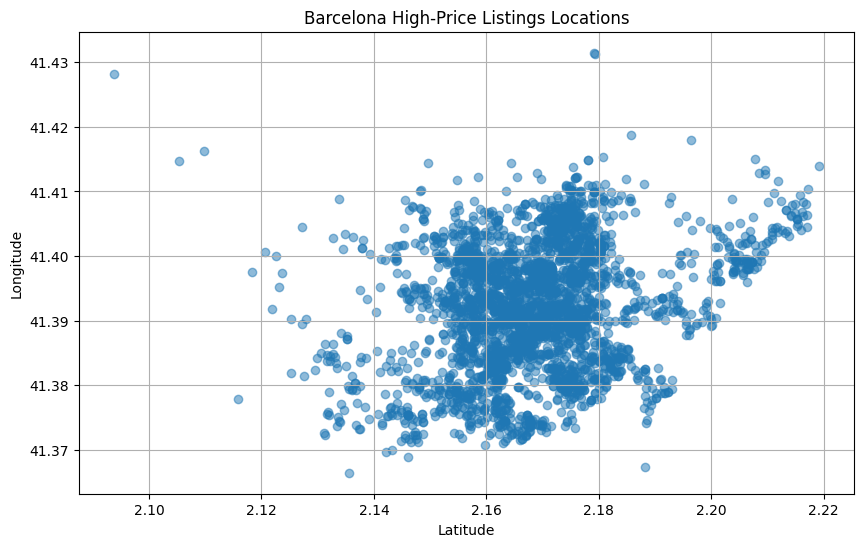

In [ ]:
import matplotlib.pyplot as plt

# Extract latitude and longitude
latitude = city_high_price['latitude']
longitude = city_high_price['longitude']

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.scatter(longitude,latitude, marker='o', alpha=0.5)  # Adjust marker and alpha as desired
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Barcelona High-Price Listings Locations')
plt.grid(True)
plt.show()

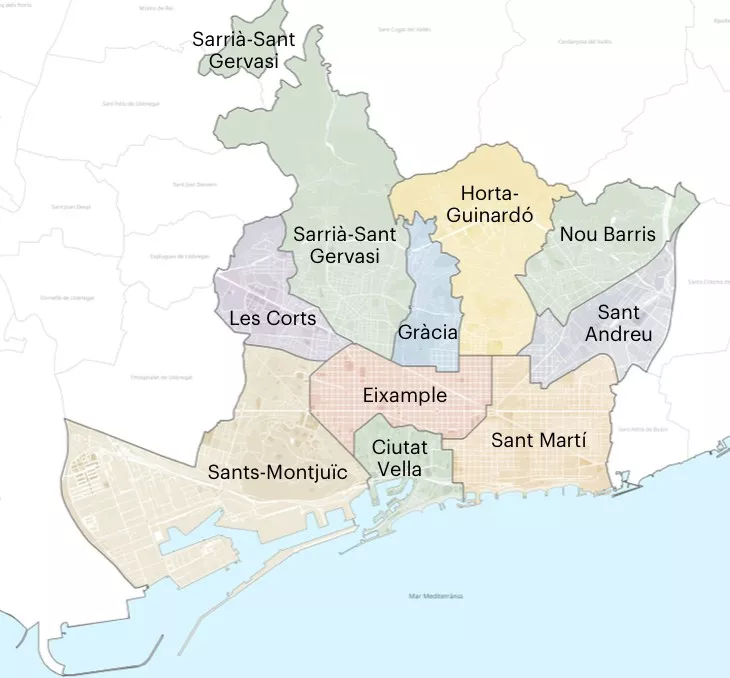

**Interpretation:**
  
The scatterplot reveals that high-price listings in Barcelona are predominantly concentrated in a few key areas. The densest clusters appear near the city center, particularly in neighborhoods like Eixample, Ciutat Vella, and parts of Gràcia. These zones are known for their architectural charm, proximity to cultural landmarks, and vibrant lifestyle, making them highly attractive for luxury buyers and renters. Secondary clusters may also extend into Les Corts and Sant Martí, indicating pockets of demand in these areas.

Focusing investments and marketing efforts in these specific neighborhoods could yield the highest returns. Adjusting pricing to reflect proximity to these hotspots ensures competitiveness while catering to the expectations of affluent clients. For example:
- Listings in Eixample could emphasize proximity to landmarks like Passeig de Gràcia and its iconic modernist buildings.
- Properties in Ciutat Vella might highlight their historical charm and access to bustling tourist areas like Las Ramblas or the Gothic Quarter.

<ipython-input-23-ce39e66543d8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_high_price['cluster'] = kmeans.fit_predict(coordinates)
<ipython-input-23-ce39e66543d8>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('gist_rainbow_r', 11)


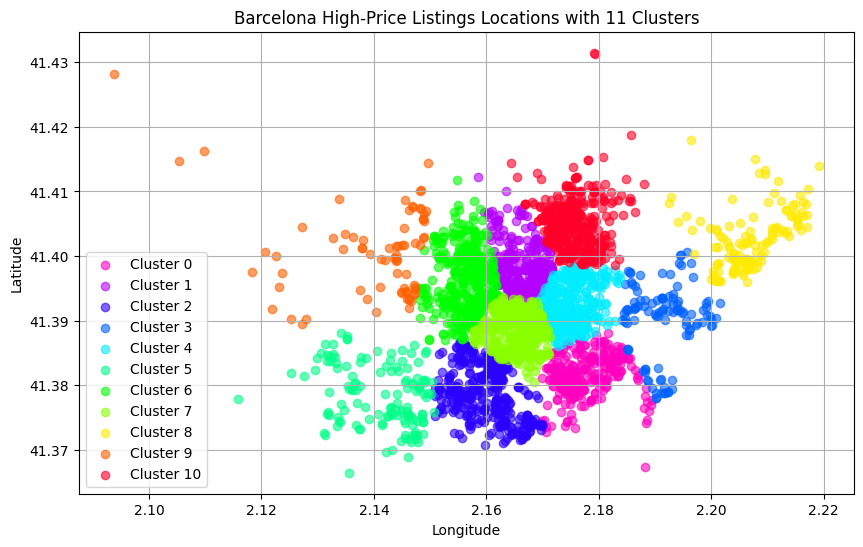

cluster
7     501
6     446
10    442
4     415
2     358
1     330
0     309
5     139
8     131
3     109
9      74
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import KMeans

# Create a DataFrame for clustering
coordinates = pd.DataFrame({'latitude': latitude, 'longitude': longitude})

# Apply KMeans clustering with 11 clusters
kmeans = KMeans(n_clusters=11, random_state=30)
city_high_price['cluster'] = kmeans.fit_predict(coordinates)

colors = plt.cm.get_cmap('gist_rainbow_r', 11)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(11):
    cluster_data = city_high_price[city_high_price['cluster'] == cluster]
    plt.scatter(cluster_data['longitude'], cluster_data['latitude'], label=f'Cluster {cluster}', alpha=0.6, color=colors(cluster))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Barcelona High-Price Listings Locations with 11 Clusters')
plt.grid(True)
plt.legend()
plt.show()

# Analyze the clusters (example: count of listings in each cluster)
print(city_high_price['cluster'].value_counts())

**Interpretation:**
 This clusetring aalign with the findigs above. In general, we can see that Cluster 7 has the highest number of high-price listings (501), followed by Clusters 6 (446) and 10 (442), indicating these are the most concentrated hotspots for premium properties. Smaller clusters like 9 (74) and 3 (109) represent niche markets or less dense areas. This distribution suggests varying demand levels across Barcelona, with certain zones dominating the high-value market.
  


### Analysis of amenities and ratings

In [ ]:
amenities = city['amenities']

amenities2 =[]

for element in amenities:
  amenities_list = element.strip('[]').split(',')
  for amen in amenities_list:
      amenities2.append(amen)

In [ ]:
print(len(amenities2))
amen_set= set(amenities2)

len(amen_set)

515207


2770

**Interpretation:** We decided to check what amenties are preffered to customers. We can give our clients the greatest living circumstances by accrediting them, and they will be delighted to choose our Airbnb.We have identified 515,207 entries, but these entries represent only 2,770 unique amenities. This suggests that many amenities are repeated across different locations, highlighting a significant overlap or standardization in the types of amenities offered (e.g., Wi-Fi, parking, or pools).

In [ ]:
from collections import Counter

amenities_count = Counter(amenities2)
top_20_amenities = amenities_count.most_common(20)

for amenity, count in top_20_amenities:
    print(f"{amenity}: {count}")

 "Wifi": 18018
 "Kitchen": 17342
 "Essentials": 14730
 "Hot water": 14140
 "Hangers": 14107
 "Iron": 13656
 "Dishes and silverware": 13193
 "Refrigerator": 12545
 "Bed linens": 12235
 "Heating": 11883
 "Cooking basics": 11840
 "Hair dryer": 11804
 "TV": 11322
 "Washer": 10326
 "Air conditioning": 10242
 "Elevator": 10207
 "Shampoo": 9043
 "Dedicated workspace": 8866
 "Oven": 8587
 "Coffee maker": 8469


**Interpretation:**

The top 20 most common amenities reveal the essentials that high-price listings in Barcelona typically offer. As expected, "Wi-Fi" (18,018) is the most frequently included amenity, followed closely by "Kitchen" (17,342) and "Essentials" (14,730), indicating that connectivity, basic household facilities, and essential supplies are top priorities for guests. Other widely provided amenities like "Hot water," "Hangers," and "Refrigerator" emphasize comfort and practicality. The inclusion of luxury or convenience items, such as "Air conditioning" (10,242) and "Elevator" (10,207), underscores the focus on enhancing guest experience in competitive markets. This data can guide us in prioritizing must-have amenities to attract customers.

In [ ]:
# Filter listings with review_scores_rating == 5
top_rated_listings = city[city['review_scores_rating'] == 5]

# Extract amenities for these listings
top_rated_amenities = top_rated_listings['amenities']

# Print the amenities
#for amenity in top_rated_amenities:
#    print(amenity)

In [ ]:
amenities_top =[]

for element in top_rated_amenities:
  amenities_list = element.strip('[]').split(',')
  for amen in amenities_list:
      amenities_top.append(amen)

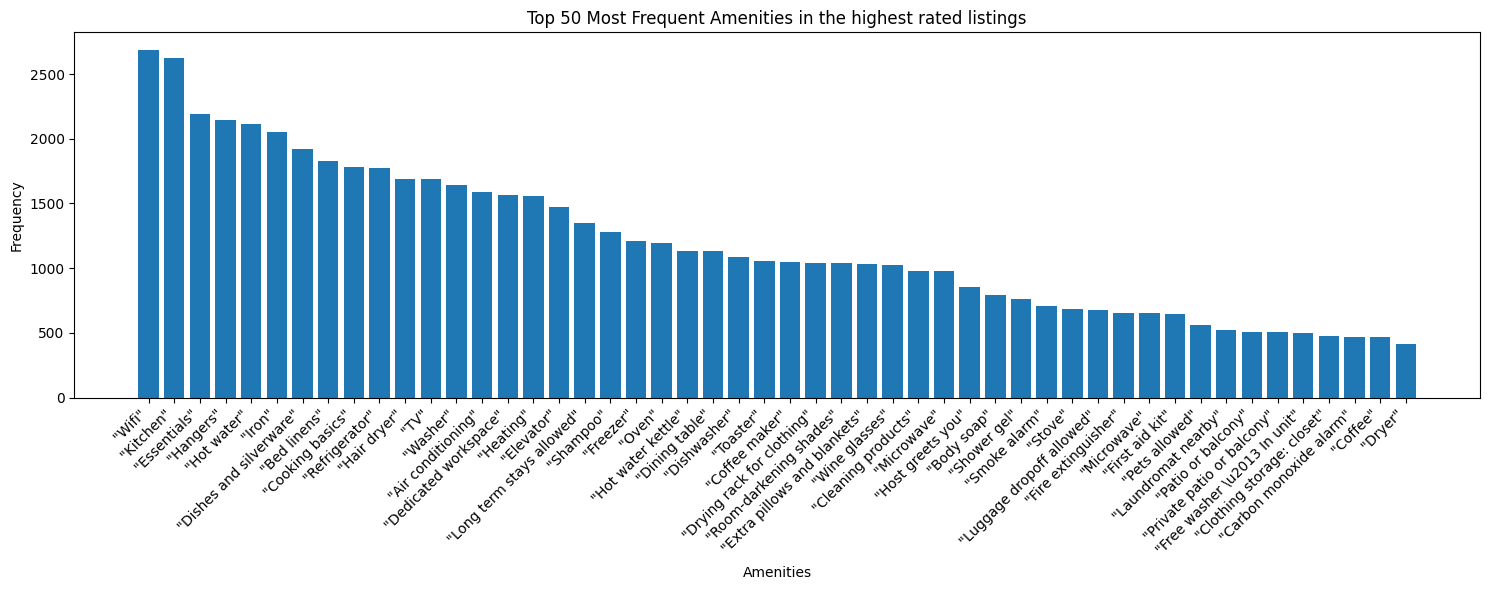

In [ ]:
import matplotlib.pyplot as plt

# pick the number of the amenities to display
x = 50
amenities_count = Counter(amenities_top)
#print(f"Total number of strings: {len(amenities_top)}")

top_x_amenities = amenities_count.most_common(x)
amenity_names, counts = zip(*top_x_amenities)

plt.figure(figsize=(15, 6))
plt.bar(amenity_names, counts)
plt.xlabel("Amenities")
plt.ylabel("Frequency")
plt.title("Top {0} Most Frequent Amenities in the highest rated listings".format(x))
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

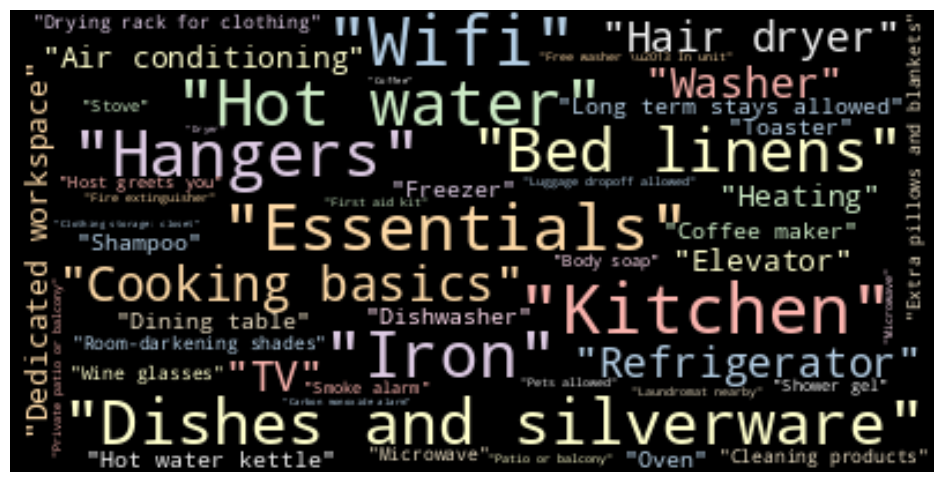

In [ ]:
from wordcloud import WordCloud
word_freq = dict(top_x_amenities)

# Use the frequency dictionary directly
wordcloud = WordCloud(max_font_size=30, background_color = "black", colormap= 'Pastel1').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Interpretation:**
 This two graphs aligns with the findings above, highlighting Wi-Fi, Kitchen, Hangers, Hot Water and many more as very important ameneties.

### Analysis of short-term rental listings among high-price properties






**Interpretation:**  

*Why Analyze Short-Term Rental Listings (Less Than 28 Days)?*

- focusing on high-price short-term rental listings allows us to evaluate a profitable revenue stream that caters to tourists and business travelers, a key driver in the luxury rental market. This analysis will inform our business strategy by identifying demand patterns, optimizing pricing models, and tailoring offerings to maximize profitability. Additionally, it ensures our approach aligns with market trends and local regulations, positioning us competitively in this high-growth sector.

In [ ]:
city_high_price.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

**Interpretation:**
 This is the column structure of our dataset, city_high_price. It provides a detailed overview of the attributes available for each high-price listing.

In [ ]:
len(city_high_price)

3254

**Interpretation:**
The dataset city_high_price contains 3,254 rows, which means it includes information about 3,254 high-price property listings. This is a sizable dataset, providing ample data for meaningful analysis.

In [ ]:
city_high_price['term'] = city_high_price['minimum_nights'].apply(lambda x: 'long term' if x >= 28 else 'short term')
city_high_price.head(5)

<ipython-input-33-cdc61c38b1b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_high_price['term'] = city_high_price['minimum_nights'].apply(lambda x: 'long term' if x >= 28 else 'short term')


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,cluster,term
0,18674,https://www.airbnb.com/rooms/18674,20240906140800,2024-09-06,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.32,HUTB-002062,t,28,28,0,0,0.31,10,short term
2,32711,https://www.airbnb.com/rooms/32711,20240906140800,2024-09-06,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,...,4.49,HUTB-001722,f,3,3,0,0,0.80,10,short term
3,34241,https://www.airbnb.com/rooms/34241,20240906140800,2024-09-06,city scrape,Stylish Top Floor Apartment - Ramblas Plaza Real,Located in close proximity to Plaza Real and L...,NaN,https://a0.muscache.com/pictures/2437facc-2fe7...,73163,...,4.35,Exempt,f,3,3,0,0,0.12,0,short term
9,49968,https://www.airbnb.com/rooms/49968,20240906140800,2024-09-06,city scrape,Sagrada Familia area - Còrsega 2,A very nice two bedroom apartment only 250 m f...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/82927561-3785...,135703,...,4.59,HUTB-001723,f,3,3,0,0,0.70,10,short term
13,337755,https://www.airbnb.com/rooms/337755,20240906140800,2024-09-06,city scrape,SEALONA VILA OLIMPICA BEACH,NaN,NaN,https://a0.muscache.com/pictures/3692192/23447...,1716315,...,4.31,HUTB-002887,t,12,12,0,0,0.56,3,short term


**Interpretation:** We created a new column, term, that classifies listings as "short term" if the minimum_nights is less than 28, and "long term" if it's 28 nights or more. This allows for easy segmentation of the listings based on rental duration.

In [ ]:
city_high_price['term'].value_counts()

,count
term,
short term,3055
long term,199


**Interpretation:** The dataset contains 3,055 short-term rental listings and 199 long-term rental listings, indicating that the majority of listings are for short-term stays. This distribution highlights the dominance of short-term rentals in the high-price market.

In [ ]:
city_high_price['term'].value_counts(normalize=True)

,proportion
term,
short term,0.938844
long term,0.061156


**Interpretation:** The proportion of short-term rental listings is approximately 93.88%, while long-term rentals make up about 6.12% of the dataset. This further emphasizes that short-term rentals dominate the high-price market.

## Step 5: Logistic regression analysis

### Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
city_high_price['term'] = city_high_price['term'].map({'long term': 0, 'short term': 1})
city_high_price

<ipython-input-37-41c4ab5522c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_high_price['term'] = city_high_price['term'].map({'long term': 0, 'short term': 1})


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,cluster,term
0,18674,https://www.airbnb.com/rooms/18674,20240906140800,2024-09-06,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.32,HUTB-002062,t,28,28,0,0,0.31,10,1
2,32711,https://www.airbnb.com/rooms/32711,20240906140800,2024-09-06,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,...,4.49,HUTB-001722,f,3,3,0,0,0.80,10,1
3,34241,https://www.airbnb.com/rooms/34241,20240906140800,2024-09-06,city scrape,Stylish Top Floor Apartment - Ramblas Plaza Real,Located in close proximity to Plaza Real and L...,NaN,https://a0.muscache.com/pictures/2437facc-2fe7...,73163,...,4.35,Exempt,f,3,3,0,0,0.12,0,1
9,49968,https://www.airbnb.com/rooms/49968,20240906140800,2024-09-06,city scrape,Sagrada Familia area - Còrsega 2,A very nice two bedroom apartment only 250 m f...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/82927561-3785...,135703,...,4.59,HUTB-001723,f,3,3,0,0,0.70,10,1
13,337755,https://www.airbnb.com/rooms/337755,20240906140800,2024-09-06,city scrape,SEALONA VILA OLIMPICA BEACH,NaN,NaN,https://a0.muscache.com/pictures/3692192/23447...,1716315,...,4.31,HUTB-002887,t,12,12,0,0,0.56,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19169,1207748775116221902,https://www.airbnb.com/rooms/1207748775116221902,20240906140800,2024-09-06,city scrape,Piso con vistas Arco de Triunfo,"Discover our charming apartment, ideal for gro...",Our apartment is located in the charming neigh...,https://a0.muscache.com/pictures/hosting/Hosti...,584815473,...,5.00,HUTB-009848,t,3,3,0,0,2.00,4,1
19189,1215842623968809652,https://www.airbnb.com/rooms/1215842623968809652,20240906140800,2024-09-06,city scrape,Apartamento de 4 habitaciones,"Great apartment of 100m2. 4 bedrooms, 3 double...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,207558702,...,5.00,HUTB008555,t,2,2,0,0,1.00,9,1
19191,1215924933025866078,https://www.airbnb.com/rooms/1215924933025866078,20240906140800,2024-09-07,city scrape,Cosy Downtown apartment 2 bathroom,Located in the ancient and central proletarian...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,568847772,...,5.00,Exempt,t,4,2,2,0,1.00,2,1
19230,1226639678203846655,https://www.airbnb.com/rooms/1226639678203846655,20240906140800,2024-09-07,city scrape,Cómodo apartamento en el Eixample,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1391607,...,4.00,HUTB-001407,t,74,74,0,0,1.00,10,1


**Interpretation:**

To begin our linear regression analysis we first need to convert our categorical data into numerical form. This process allows the 'long term' and 'short term' columns to be used effectively in our linear regression analysis as numerical representations are more compact and faster to process comared to strings.

In [ ]:
city_high_price.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

**Interpretation:**

Next, we have retrieved all of the column names to help us understand the structure and contents of the dataset. This will help us to now decide what features need our focus and plan our analysis.

In [ ]:
city_high_price = pd.get_dummies(city_high_price, columns=['neighbourhood_group_cleansed', 'room_type'], drop_first=True)
city_high_price.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availability', 'availab

**Interpretation:**

Now, we have converted the categorical columns 'neighbourhood_group_cleansed' and 'room_type' into binary dummy variables. From doing this, we will now have new columns in the DataFrame to represent these categories as numerical feautres.

For our business this is important because we can now identify the impact of certain areas on certain metircs like price, optimize our marketing strategies, and customer preferences on room type.

### Defining X and y:

In [ ]:
X = city_high_price[['price', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_cleansed_Eixample', 'neighbourhood_group_cleansed_Gràcia',
       'neighbourhood_group_cleansed_Horta-Guinardó', 'neighbourhood_group_cleansed_Les Corts',
       'neighbourhood_group_cleansed_Nou Barris', 'neighbourhood_group_cleansed_Sant Andreu',
       'neighbourhood_group_cleansed_Sant Martí', 'neighbourhood_group_cleansed_Sants-Montjuïc',
       'neighbourhood_group_cleansed_Sarrià-Sant Gervasi', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room']]
y = city_high_price['term']

In [ ]:
X = X.dropna()
y = y.loc[X.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Interpretation:**

This code is part of a pipeline to create a predictive model for a business scenario and is an essential step of preparing data and building a foundation for actionable insights. By leveraging such techniques, we can enhance profitability, competitiveness, and operational efficiency.

### Analysis of the single coefficients:

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model_logreg = LogisticRegression(max_iter=1000)
model_logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**Interpretation:**

To continue on with our analysis, we have now standardized features by removing the mean and scaling to unit variance, initialized a logistic regression model with a maximum of 1000 iterations for optimization and logistic regression model to the training data.

This is all important for us to include because it:


*   Ensures all features contribute equally to the model
*   we're able to understand the relationship between input features and predicted outcomes
*   Trains the model to learn the relationship between independent variables and target variable
*   Its application can improve decision-making, optimize resources, and provide actionable insights to maintain a competitive edge








In [ ]:
coefficients = model_logreg.coef_
coefficients

array([[ 1.87786786e-03,  2.29515462e-02,  1.25255256e+00,
        -2.42576720e-04, -1.69651841e-05,  7.35771170e-01,
         1.03509420e+00,  7.86465721e-02,  6.66323903e-01,
         3.70764949e-01,  7.83352853e-04,  5.68908910e-01,
         1.16804660e+00,  1.93622119e-01,  1.48050823e+00,
         1.23796614e+00,  7.57527476e-02]])

**Interpretation:**

Finding the coefficients is useful to us as it reveals to us which factors most influence success. From this we can improve our strategic property selection by choosing properties with the characteristics that drive bookings and profitablility. Thus, lowering our risk of poor investment returns.


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients[0]
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

                                             Feature  Coefficient
14                              room_type_Hotel room     1.480508
2                                  reviews_per_month     1.252553
15                            room_type_Private room     1.237966
12       neighbourhood_group_cleansed_Sants-Montjuïc     1.168047
6                neighbourhood_group_cleansed_Gràcia     1.035094
5              neighbourhood_group_cleansed_Eixample     0.735771
8             neighbourhood_group_cleansed_Les Corts     0.666324
11           neighbourhood_group_cleansed_Sant Martí     0.568909
9            neighbourhood_group_cleansed_Nou Barris     0.370765
13  neighbourhood_group_cleansed_Sarrià-Sant Gervasi     0.193622
7        neighbourhood_group_cleansed_Horta-Guinardó     0.078647
16                             room_type_Shared room     0.075753
1                                  number_of_reviews     0.022952
0                                              price     0.001878
10        

**Interpretations:**

Top influential Features:
1.   room_type_Hotel room (Coefficient: 1.480508)
2.   reviews_per_month (Coefficient: 1.252553)
3.   room_type_Private room (Coefficient: 1.237966)

Neighborhood influence with noteable impact:
1.   neighbourhood_group_cleansed_Sants-Montjuïc (1.168047)
2.   neighbourhood_group_cleansed_Gràcia (1.035094)
3.   neighbourhood_group_cleansed_Eixample (0.735771)

For our business:

 Investing or focusing efforts on listings in these neighborhoods could yield higher revenue or occupancy. By understanding which factors drive performance, we can make more informed, data-driven decisions to improve profitability and operational efficiency.

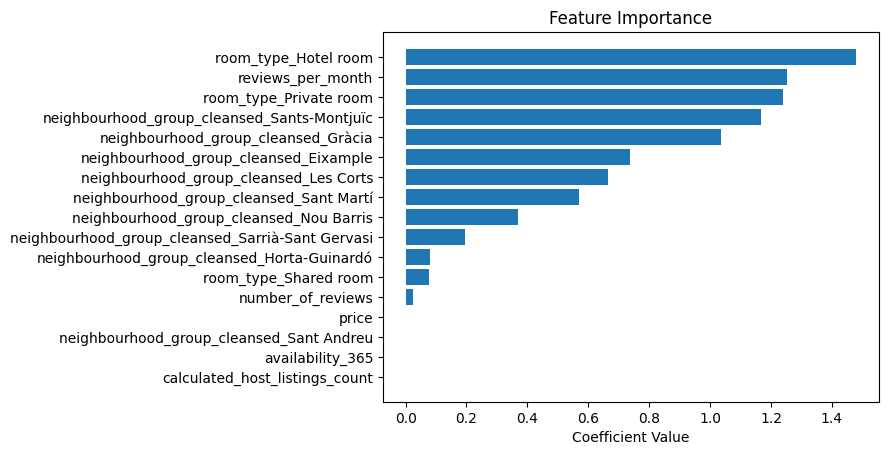

In [ ]:
feature_importance.sort_values(by='Coefficient', ascending=True, inplace=True)
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()

In [ ]:
print("Top positive features:")
print(feature_importance.head(5))

print("Top negative features:")
print(feature_importance.tail(5))

Top positive features:
                                     Feature  Coefficient
3             calculated_host_listings_count    -0.000243
4                           availability_365    -0.000017
10  neighbourhood_group_cleansed_Sant Andreu     0.000783
0                                      price     0.001878
1                          number_of_reviews     0.022952
Top negative features:
                                        Feature  Coefficient
6           neighbourhood_group_cleansed_Gràcia     1.035094
12  neighbourhood_group_cleansed_Sants-Montjuïc     1.168047
15                       room_type_Private room     1.237966
2                             reviews_per_month     1.252553
14                         room_type_Hotel room     1.480508


**Interpretation:**

For Top Positive Features:

*   Number of Reviews (0.022952): A higher number of reviews positively correlates with the target and suggests that properties with more reviews are more successful, likely due to the credibility and trust reviews bring
*   Price (0.001878): positive coefficient implies that higher prices are associated with the desired outcome, potentially indicating perceived value or higher-end listings
*   Neighbourhood Group (Sant Andreu - 0.000783): Properties in this neighborhood are positively associated with the outcome
*   Availability (365 days - -0.000017): Though very small, the negative coefficient suggests that total availability might not be a strong driver of success
*   Calculated Host Listings Count (-0.000243): A very slightly negative correlation implies that hosting too many properties may dilute quality or focus

For Top Negative Features:

*   Room Type (Hotel Room - 1.480508): Hotel rooms are strongly negatively associated, potentially because users might prefer more unique or home-like accommodations
*   Reviews per Month (1.252553): Surprisingly negative, which may indicate frequent but low-quality or polarizing reviews
*   Room Type (Private Room - 1.237966): Private rooms are also negatively associated compared to other room types.
*   Neighbourhood Group (Sants-Montjuïc - 1.168047): Properties in this neighborhood negatively impact the outcome, suggesting location matters significantly
*   Neighbourhood Group (Gràcia - 1.035094): Another neighborhood with a negative correlation to success

Business Insights:

As a business, we can now take all of these points into account to optimize our listings based off of reviews, strategically targert locations, rethink room type offereings, pricing strategy and host listing management.















In [ ]:
city_high_price['term'] = city_high_price['term'].map({0: 'Long Term', 1: 'Short Term'})

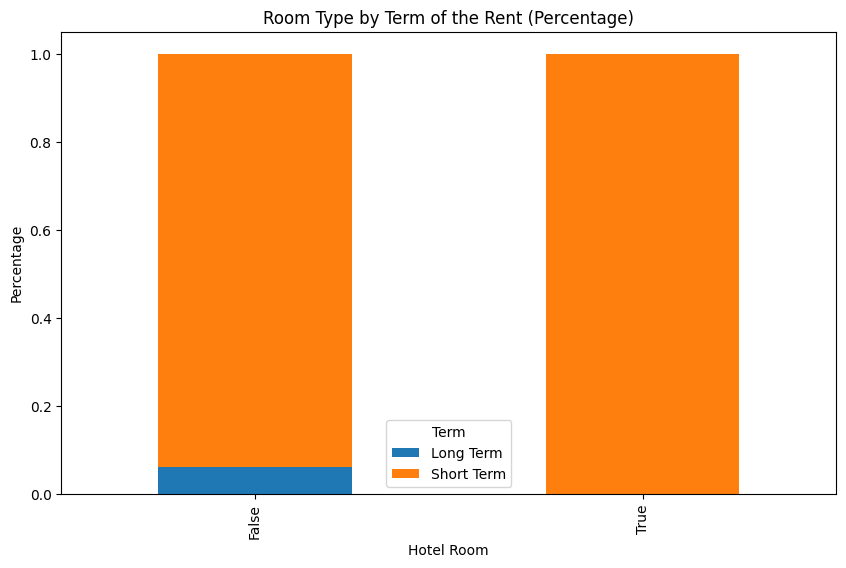

In [ ]:
crosstab_normalized = pd.crosstab(city_high_price['room_type_Hotel room'], city_high_price['term'], normalize='index')

crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Room Type by Term of the Rent (Percentage)')
plt.ylabel('Percentage')
plt.xlabel('Hotel Room')
plt.legend(title='Term')
plt.show()

### Evaluation of the model:

In [ ]:
y_pred_logreg = model_logreg.predict(X_test)

In [ ]:
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)

In [ ]:
print("Accuracy:", accuracy_logreg)
print("Confusion Matrix:\n", conf_matrix_logreg)

TN, FP, FN, TP = conf_matrix_logreg.ravel()

sensitivity_logreg = TP / (TP + FN) if (TP + FN) != 0 else 0
specificity_logreg = TN / (TN + FP) if (TN + FP) != 0 else 0

print(f"Sensitivity (Recall): {sensitivity_logreg:.2f}")
print(f"Specificity: {specificity_logreg:.2f}")

precision_logreg = TP / (TP + FP) if (TP + FP) != 0 else 0
f1_score_logreg = 2 * (precision_logreg * sensitivity_logreg) / (precision_logreg + sensitivity_logreg) if (precision_logreg + sensitivity_logreg) != 0 else 0

print(f"F1-Score: {f1_score_logreg:.2f}")

Accuracy: 0.9477726574500768
Confusion Matrix:
 [[  1  34]
 [  0 616]]
Sensitivity (Recall): 1.00
Specificity: 0.03
F1-Score: 0.97


**Interpretation:**

The model performs exceptionally well at identifying positive cases, which is crucial for scenarios where missing a critical case is costly.  However, it shows poor performance on the negative class. We believe this is due to it predicting almost everything as short term, because almost everything in the dataset is short term.

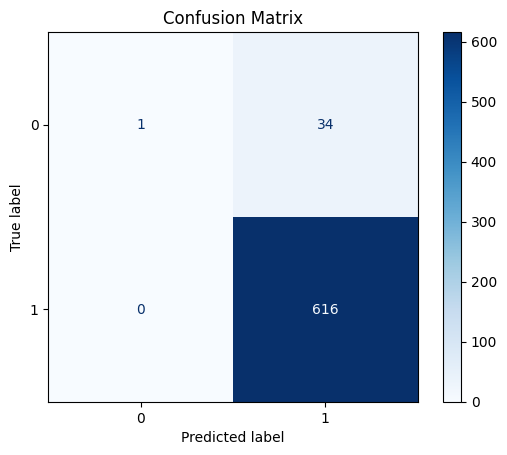

In [ ]:
ConfusionMatrixDisplay.from_estimator(model_logreg, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

**Interpretation:**

This confusion matrix provides a visual summary of the performance of a classification model. While all positive instances are identified correctly, the model struggles with identifying the negative class (only 1 true negative out of 35 total negatives). Due to this, many negative cases are misclassified as positive, which may result in inefficiencies and the imbalance in true negatives and false positives reflects a potential issue with class imbalance or bias in the model toward the positive class.

Business Insights:
Eventhough the results we are getting show that we should refine the model, we believe this is due to it predicting almost everything as short term, because almost everything in the dataset is short term.

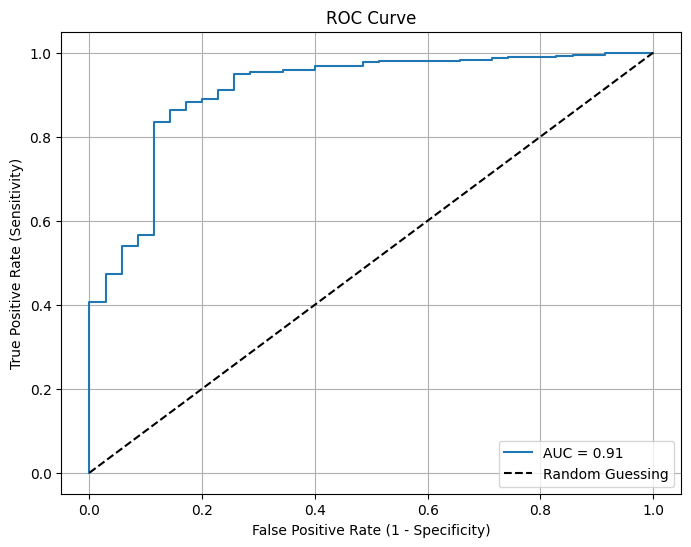

In [ ]:
y_prob_logreg = model_logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_logreg)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob_logreg):.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend()
plt.grid()
plt.show()

**Interpretation:**

The model has a strong ability to differentiate between the positive and negative classes. It significantly outperforms random guessing. The curve rises sharply at first, indicating that the model achieves a high true positive rate with a relatively low false positive rate. Understanding and leveraging such insights allows us to make data-driven decisions, reduce risks, and optimize outcomes effectively.

# Step 6: Sentiment analysis

In [ ]:
#file path to the choosen file
file_path="/content/drive/MyDrive/Colab Notebooks/Airbnb 2/Barcelona/reviews.csv.gz"

reviews_city = pd.read_csv(file_path, compression='gzip')

reviews_city["listing_id"]

In [ ]:
len(reviews_city["listing_id"].unique())

**Interpretation:** There are 14,731 distinct properties with reviews. This offers a broad view of the market, enabling analysis on guest feedback, trends, and patterns across various listings.

In [ ]:
comments = reviews_city["comments"]

In [ ]:
comments

**Interpretation:**

At this point of the analysis, we have decided to perform **sentiment analysis** on the comments to gain insights into guest satisfaction and identify key factors that influence their experiences. By analyzing the sentiment, we can determine whether guests are generally positive, neutral, or negative about their stays, helping us pinpoint areas for improvement and highlight strong aspects in marketing efforts. This analysis will also support decision-making for pricing, property upgrades, and identifying competitive advantages based on guest feedback.

**Key Insights:**
1. **Guest Satisfaction:** Positive comments like "Clean, spacious flat," and "A wonderful stay" suggest that apartament and space are strong factors driving satisfaction.

2. **Room and Property Quality:** Comments referencing "well-equipped," "cozy," and "spacious" highlight the importance of property amenities and quality, which can be leveraged for marketing.

3. **Service and Experience:** Feedback mentioning "fast check-in," "flexible," and "exceptional hosts" suggests that customer service plays a significant role in guest satisfaction.

4. **Location:** Multiple comments emphasize location as a key factor ("Great location," "Buena ubicación"). Understanding how often location is mentioned positively can help identify high-demand areas and optimize marketing.

5. **Negative Aspects:** Words like "small room" and "noisy" might indicate areas of improvement.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_vader_sentiment(text):
    if isinstance(text, str):  # Ensure the input is a string
        scores = vader.polarity_scores(text)
        return scores['compound']  # Compound score summarizes the sentiment
    else:
        return None  # Return None for non-string inputs

# Clean the comments: Replace NaN with empty strings
comments_cleaned = comments.fillna('')

# Apply sentiment analysis
comments_sentiments = comments_cleaned.apply(get_vader_sentiment)

# Add sentiment scores to the DataFrame
reviews_city["sentiment"] = comments_sentiments

# Example: Count the number of positive, negative, and neutral reviews
positive = (comments_sentiments > 0.05).sum()  # Positive threshold
negative = (comments_sentiments < -0.05).sum() # Negative threshold
neutral = ((comments_sentiments >= -0.05) & (comments_sentiments <= 0.05)).sum()

print(f"Positive reviews: {positive}")
print(f"Negative reviews: {negative}")
print(f"Neutral reviews: {neutral}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


NameError: name 'comments' is not defined

**Interpretation:**
The sentiment analysis results from the reviews indicate the following:
1. Positive reviews: 637,322, which suggests a significant portion of the reviews are overall favorable.
2. Negative reviews: 78,075, reflecting a smaller but still notable portion of reviews expressing dissatisfaction.
3. Neutral reviews: 212,077, which means a substantial number of reviews have mixed or neutral sentiment.

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of sentiment scores
reviews_city["sentiment"].hist(bins=50)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Comments')
plt.show()


**Interpretation:**

The histogram visualizes the distribution of sentiment scores for the analyzed reviews. Here’s how the graph aligns with the findings above:
- Most reviews skew heavily toward positive sentiment, as seen in the higher bar density on the positive side.
- There’s a significant spike in neutral scores, suggesting that many comments are mixed or do not convey a strong opinion.
- Negative sentiment is the least frequent, with sparse distribution across the negative range.

Overall, the distribution highlights a predominantly positive sentiment among the reviews, with fewer neutral and negative responses.

In [ ]:
city.columns

In [ ]:
# Convert 'host_is_superhost' to numeric (1 for True, 0 for False)
city['host_is_superhost'] = city['host_is_superhost'].map({'t': 1, 'f': 0})


In [ ]:
import pandas as pd

city_sentiments = reviews_city[["listing_id", "sentiment"]]

city_superhost = city[["id", "host_is_superhost"]]

# Merge on `host_id`
# Merge on `listing_id` from mallorca_sentiments and `id` from menorca_superhost
merged_data = pd.merge(
    city_sentiments,
    city_superhost,
    how="inner",
    left_on="listing_id",
    right_on="id"
)

# Correlation analysis
correlation = merged_data['sentiment'].corr(merged_data['host_is_superhost'])

print("Correlation between sentiment and host_is_superhost:", correlation)

# Optional visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=merged_data['host_is_superhost'], y=merged_data['sentiment'])
plt.title('Sentiment by Superhost Status')
plt.xlabel('Is Superhost (0 = No, 1 = Yes)')
plt.ylabel('Sentiment Score')
plt.show()


**Interpretation:**

The boxplot shows the distribution of sentiment scores for hosts based on their Superhost status (0 = Not Superhost, 1 = Superhost):

1. **Sentiment by Superhost Status:**

- Superhost (1): The median sentiment score is slightly higher compared to non-Superhosts, indicating that reviews for Superhosts are generally more positive.
- Non-Superhost (0): While the median is slightly lower, the range and spread of sentiment scores are comparable to those of Superhosts.

2. **Spread of Sentiments:**

- Both groups show a wide range of sentiment scores from very negative to very positive.
- The interquartile range (IQR) for both groups is similar, indicating that the variability in sentiment scores is consistent regardless of Superhost status.
- Extreme sentiment values (both positive and negative) are present for both groups, as evidenced by the whiskers and outliers.

3. **Correlation Coefficient:**
- The calculated correlation between sentiment scores and Superhost status is 0.1405.
- This is a weak positive correlation, suggesting that Superhost status has a slight association with more positive sentiments but is not a strong predictor.